In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd966d820-d302-447a-8c73-367f102614c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-02-18T08:38:44.661Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8822}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10819, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [17]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df= pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

C:\Users\yusuf\AppData\Local\Temp\ipykernel_14712\1812552491.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963106e+07,1.963106e+07,False,NaN,1,NaN,NaN,None,2024-02-18T08:38:00.000Z,51750.098775,2.127735e+10,-12.9520,0.117845,-0.033187,7.418284,25.747729,20.799116,39.200054,1.015909e+12,52.1715,1.086752e+12,None,2024-02-18T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201655e+08,1.201655e+08,True,NaN,2,NaN,NaN,None,2024-02-18T08:38:00.000Z,2804.108730,1.770308e+10,1.9929,-0.012432,0.907999,10.729378,13.950053,26.843429,39.109562,3.369570e+11,17.3043,3.369570e+11,None,2024-02-18T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
2,825,Tether USDt,USDT,tether,74768,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.765741e+10,9.960008e+10,True,NaN,3,NaN,NaN,None,2024-02-18T08:37:00.000Z,1.000227,4.737691e+10,-3.9990,0.002112,-0.006300,-0.035110,0.145618,0.043455,-0.030037,9.767956e+10,5.0163,9.962268e+10,None,2024-02-18T08:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 08:38:50.555765
3,1839,BNB,BNB,bnb,2067,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495443e+08,1.495443e+08,False,NaN,4,NaN,NaN,None,2024-02-18T08:37:00.000Z,356.133297,1.090028e+09,-18.1246,0.257012,-0.268115,9.712013,14.163270,38.611590,43.966909,5.325772e+10,2.7358,5.325772e+10,None,2024-02-18T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.407225e+08,5.698762e+08,True,NaN,5,NaN,NaN,None,2024-02-18T08:38:00.000Z,109.211509,1.348649e+09,-22.4504,0.064269,-0.705675,0.056692,16.252340,43.141290,82.432919,4.813196e+10,2.4715,6.223703e+10,None,2024-02-18T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,None,2024-02-18T08:38:00.000Z,0.555055,9.209323e+08,-18.4802,-0.152289,-0.424911,5.137944,1.668079,-8.886521,-10.726529,3.028300e+10,1.5563,5.550545e+10,None,2024-02-18T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
6,3408,USDC,USDC,usd-coin,16744,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.808887e+10,2.808887e+10,False,NaN,7,NaN,NaN,None,2024-02-18T08:38:00.000Z,0.999969,3.877276e+09,-26.3331,-0.002557,0.011315,-0.001746,-0.015750,-0.030243,-0.009184,2.808800e+10,1.4424,2.808800e+10,None,2024-02-18T08:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 08:38:50.555765
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545652e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-18T08:37:00.000Z,0.628823,6.660626e+08,43.5978,0.917763,6.721633,12.583459,26.266895,6.573872,61.681052,2.229589e+10,1.1460,2.829705e+10,None,2024-02-18T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 08:38:50.555765
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",

In [24]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd966d820-d302-447a-8c73-367f102614c1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data
    
    df= pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\yusuf\Desktop\DataScience Journey\Data Analyst Bootcamp\PortfolioProjects\API.csv'):
        df.to_csv(r'C:\Users\yusuf\Desktop\DataScience Journey\Data Analyst Bootcamp\PortfolioProjects\API.csv',header='column_names')
    else:
         df.to_csv(r'C:\Users\yusuf\Desktop\DataScience Journey\Data Analyst Bootcamp\PortfolioProjects\API.csv',mode='a',header=False)
        

In [25]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed successfully")
    sleep(60)
exit()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_14712\1891197169.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


API Runner Completed successfully


C:\Users\yusuf\AppData\Local\Temp\ipykernel_14712\1891197169.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


API Runner Completed successfully


C:\Users\yusuf\AppData\Local\Temp\ipykernel_14712\1891197169.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


API Runner Completed successfully


C:\Users\yusuf\AppData\Local\Temp\ipykernel_14712\1891197169.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


API Runner Completed successfully


KeyboardInterrupt: 

In [26]:
df74=pd.read_csv(r'C:\Users\yusuf\Desktop\DataScience Journey\Data Analyst Bootcamp\PortfolioProjects\API.csv')
df74

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.963106e+07,1.963106e+07,False,NaN,1,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,51984.319764,2.125303e+10,-9.4949,0.570689,0.449789,7.817863,25.878675,21.203700,39.740899,1.020507e+12,52.1980,1.091671e+12,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
1,1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201655e+08,1.201655e+08,True,NaN,2,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,2820.282235,1.796708e+10,1.7518,0.687634,1.507618,11.576242,13.891777,27.164242,39.330659,3.389005e+11,17.3345,3.389005e+11,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
2,2,825,Tether USDt,USDT,tether,74769,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.765741e+10,9.960008e+10,True,NaN,3,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,1.000144,4.717509e+10,-4.1147,0.017938,0.015426,-0.028669,0.080894,0.038800,-0.032143,9.767149e+10,4.9958,9.961445e+10,NaN,2024-02-18T09:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 09:24:26.044773
3,3,1839,BNB,BNB,bnb,2067,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495443e+08,1.495443e+08,False,NaN,4,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,357.850566,1.090451e+09,-16.9406,0.710724,0.205576,10.366176,14.560166,39.092655,44.559731,5.351453e+10,2.7377,5.351453e+10,NaN,2024-02-18T09:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.407225e+08,5.698762e+08,True,NaN,5,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,110.101365,1.344428e+09,-19.6608,0.979616,0.827989,0.447347,16.183140,43.940486,83.737926,4.852414e+10,2.4819,6.274414e+10,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
5,5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,0.558577,9.131193e+08,-17.6656,0.766635,0.364625,5.412072,1.808660,-8.914018,-10.381790,3.047518e+10,1.5593,5.585771e+10,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
6,6,3408,USDC,USDC,usd-coin,16744,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.808887e+10,2.808887e+10,False,NaN,7,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,1.000018,3.844863e+09,-18.8515,0.003518,0.009946,0.004105,-0.027034,-0.005734,-0.006916,2.808938e+10,1.4367,2.808938e+10,NaN,2024-02-18T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 09:24:26.044773
7,7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.545652e+10,3.662821e+10,False,NaN,8,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,0.637111,6.910080e+08,50.8238,1.623014,8.487982,14.326934,27.368739,7.783921,62.753328,2.258974e+10,1.1559,2.866999e+10,NaN,2024-02-18T09:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
8,8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi.

In [28]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)


In [29]:
df74

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19631056.00000,19631056.00000,False,NaN,1,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,51984.31976,21253030931.55767,-9.49490,0.57069,0.44979,7.81786,25.87868,21.20370,39.74090,1020507092399.75024,52.19800,1091670715034.12000,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
1,1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120165454.17797,120165454.17797,True,NaN,2,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,2820.28223,17967075728.93562,1.75180,0.68763,1.50762,11.57624,13.89178,27.16424,39.33066,338900495655.96497,17.33450,338900495655.96002,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
2,2,825,Tether USDt,USDT,tether,74769,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,97657406456.63940,99600078701.92628,True,NaN,3,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,1.00014,47175092287.93735,-4.11470,0.01794,0.01543,-0.02867,0.08089,0.03880,-0.03214,97671494662.19405,4.99580,99614447160.33000,NaN,2024-02-18T09:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 09:24:26.044773
3,3,1839,BNB,BNB,bnb,2067,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149544347.82255,149544347.82255,False,NaN,4,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,357.85057,1090451418.47840,-16.94060,0.71072,0.20558,10.36618,14.56017,39.09266,44.55973,53514529476.93321,2.73770,53514529476.93000,NaN,2024-02-18T09:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,440722456.10538,569876151.81543,True,NaN,5,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,110.10136,1344427646.23496,-19.66080,0.97962,0.82799,0.44735,16.18314,43.94049,83.73793,48524143986.30108,2.48190,62744142173.77000,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
5,5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,0.55858,913119253.94361,-17.66560,0.76663,0.36462,5.41207,1.80866,-8.91402,-10.38179,30475181678.43286,1.55930,55857706249.58000,NaN,2024-02-18T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 09:24:26.044773
6,6,3408,USDC,USDC,usd-coin,16744,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28088873453.50665,28088873453.50665,False,NaN,7,NaN,NaN,NaN,2024-02-18T09:23:00.000Z,1.00002,3844863258.39118,-18.85150,0.00352,0.00995,0.00410,-0.02703,-0.00573,-0.00692,28089375039.21622,1.43670,28089375039.22000,NaN,2024-02-18T09:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 09:24:26.044773
7,7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35456523484.14200,36628205944.37800,False,NaN,8,NaN,NaN,NaN,2024-02-18T09:22:00.000Z,0.63711,691007950.59443,50.82380,1.62301,8.48798,14.32693,27.36874,7.78392,62.75333,22589735556.72426,1.15590,28669987922.17000,NaN,2024-02-18T09:22:00.0

In [31]:
grouped_df=df74.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
grouped_df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.54949,0.42387,7.78213,25.83910,21.16839,39.66606
Ethereum,0.69123,1.51717,11.59471,13.90751,27.18362,39.30651
Tether USDt,0.01244,0.00154,-0.02441,0.10760,0.04369,-0.02718
BNB,0.69580,0.20353,10.36520,14.56631,39.07162,44.52653
Solana,1.03170,0.91840,0.50008,16.29907,43.70454,83.72855
XRP,0.75682,0.37932,5.41342,1.84609,-8.95922,-10.38935
USDC,-0.00353,0.00466,-0.00068,-0.02347,-0.01302,-0.00956
Cardano,1.59166,8.51944,14.37647,27.42417,7.79001,62.80474
Avalanche,0.81883,1.07308,-2.16206,19.74113,-4.09166,80.08206


In [32]:
stacked_df=grouped_df.stack()
stacked_df

name                                     
Bitcoin      quote.USD.percent_change_1h      0.54949
             quote.USD.percent_change_24h     0.42387
             quote.USD.percent_change_7d      7.78213
             quote.USD.percent_change_30d    25.83910
             quote.USD.percent_change_60d    21.16839
             quote.USD.percent_change_90d    39.66606
Ethereum     quote.USD.percent_change_1h      0.69123
             quote.USD.percent_change_24h     1.51717
             quote.USD.percent_change_7d     11.59471
             quote.USD.percent_change_30d    13.90751
             quote.USD.percent_change_60d    27.18362
             quote.USD.percent_change_90d    39.30651
Tether USDt  quote.USD.percent_change_1h      0.01244
             quote.USD.percent_change_24h     0.00154
             quote.USD.percent_change_7d     -0.02441
             quote.USD.percent_change_30d     0.10760
             quote.USD.percent_change_60d     0.04369
             quote.USD.percent_change_90

In [33]:
type(stacked_df)

pandas.core.series.Series

In [34]:
df5=stacked_df.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.54949
            quote.USD.percent_change_24h   0.42387
            quote.USD.percent_change_7d    7.78213
            quote.USD.percent_change_30d  25.83910
            quote.USD.percent_change_60d  21.16839
            quote.USD.percent_change_90d  39.66606
Ethereum    quote.USD.percent_change_1h    0.69123
            quote.USD.percent_change_24h   1.51717
            quote.USD.percent_change_7d   11.59471
            quote.USD.percent_change_30d  13.90751
            quote.USD.percent_change_60d  27.18362
            quote.USD.percent_change_90d  39.30651
Tether USDt quote.USD.percent_change_1h    0.01244
            quote.USD.percent_change_24h   0.00154
            quote.USD.percent_change_7d   -0.02441
            quote.USD.percent_change_30d   0.10760
            quote.USD.percent_change_60d   0.04369
            quote.USD.percent_change_90d  -0.02718
BNB         quote.USD.percent_change_1h    0.69580
            quote.USD.percent_change_24h   0.20353
            quote.USD.percent_change_7d   10.36520
            quote.USD.percent_change_30d  14.56631
            quote.USD.percent_change_60d  39.07162
            quote.USD.percent_change_90d  44.52653
Solana      quote.USD.percent_change_1h    1.03170
            quote.USD.percent_change_24h   0.91840
            quote.USD.percent_change_7d    0.50008
            quote.USD.percent_change_30d  16.29907
            quote.USD.percent_change_60d  43.70454
            quote.USD.percent_change_90d  83.72855
XRP         quote.USD.percent_change_1h    0.75682
            quote.USD.percent_change_24h   0.37932
            quote.USD.percent_change_7d    5.41342
            quote.USD.percent_change_30d   1.84609
            quote.USD.percent_change_60d  -8.95922
            quote.USD.percent_change_90d -10.38935
USDC        quote.USD.percent_change_1h   -0.00353
            quote.USD.percent_change_24h   0.00466
            quote.USD.percent_change_7d   -0.00068
            quote.USD.percent_change_30d  -0.02347
            quote.USD.percent_change_60d  -0.01302
            quote.USD.percent_change_90d  -0.00956
Cardano     quote.USD.percent_change_1h    1.59166
            quote.USD.percent_change_24h   8.51944
            quote.USD.percent_change_7d   14.37647
            quote.USD.percent_change_30d  27.42417
            quote.USD.percent_change_60d   7.79001
            quote.USD.percent_change_90d  62.80474
Avalanche   quote.USD.percent_change_1h    0.81883
            quote.USD.percent_change_24h   1.07308
            quote.USD.percent_change_7d   -2.16206
            quote.USD.percent_change_30d  19.74113
            quote.USD.percent_change_60d  -4.09166
            quote.USD.percent_change_90d  80.08206
Dogecoin    quote.USD.percent_change_1h    0.46239
            quote.USD.percent_change_24h  -0.53256
            quote.USD.percent_change_7d    1.87860
            quote.USD.percent_change_30d   7.56283
            quote.USD.percent_change_60d  -6.87394
            quote.USD.percent_change_90d   4.08910
TRON        quote.USD.percent_change_1h    0.07031
            quote.USD.percent_change_24h   0.22289
            quote.USD.percent_change_7d    8.48484
            quote.USD.percent_change_30d  24.37955
            quote.USD.percent_change_60d  32.57603
            quote.USD.percent_change_90d  29.58105
Chainlink   quote.USD.percent_change_1h    0.69516
            quote.USD.percent_change_24h   2.92038
            quote.USD.percent_change_7d   -1.96987
            quote.USD.percent_change_30d  31.91817
            quote.USD.percent_change_60d  38.91746
            quote.USD.percent_change_90d  32.31649
Polkadot    quote.USD.percent_change_1h    1.06245
            quote.USD.percent_change_24h   2.77508
            quote.USD.percent_change_7d    7.37775
            quote.USD.percent_change_30d  11.84781
            quote.USD.percent_change_60d  12.67763
            quo

In [35]:
type(df5)

pandas.core.frame.DataFrame

In [43]:
index=pd.Index(range(df5.count()['values']))
#df6=df5.set_index(index)
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.54949
1,Bitcoin,quote.USD.percent_change_24h,0.42387
2,Bitcoin,quote.USD.percent_change_7d,7.78213
3,Bitcoin,quote.USD.percent_change_30d,25.83910
4,Bitcoin,quote.USD.percent_change_60d,21.16839
5,Bitcoin,quote.USD.percent_change_90d,39.66606
6,Ethereum,quote.USD.percent_change_1h,0.69123
7,Ethereum,quote.USD.percent_change_24h,1.51717
8,Ethereum,quote.USD.percent_change_7d,11.59471
9,Ethereum,quote.USD.percent_change_30d,13.90751


In [44]:
df6=df6.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.54949
1,Bitcoin,quote.USD.percent_change_24h,0.42387
2,Bitcoin,quote.USD.percent_change_7d,7.78213
3,Bitcoin,quote.USD.percent_change_30d,25.83910
4,Bitcoin,quote.USD.percent_change_60d,21.16839
5,Bitcoin,quote.USD.percent_change_90d,39.66606
6,Ethereum,quote.USD.percent_change_1h,0.69123
7,Ethereum,quote.USD.percent_change_24h,1.51717
8,Ethereum,quote.USD.percent_change_7d,11.59471
9,Ethereum,quote.USD.percent_change_30d,13.90751


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.54949
1,Bitcoin,24h,0.42387
2,Bitcoin,7d,7.78213
3,Bitcoin,30d,25.83910
4,Bitcoin,60d,21.16839
5,Bitcoin,90d,39.66606
6,Ethereum,1h,0.69123
7,Ethereum,24h,1.51717
8,Ethereum,7d,11.59471
9,Ethereum,30d,13.90751


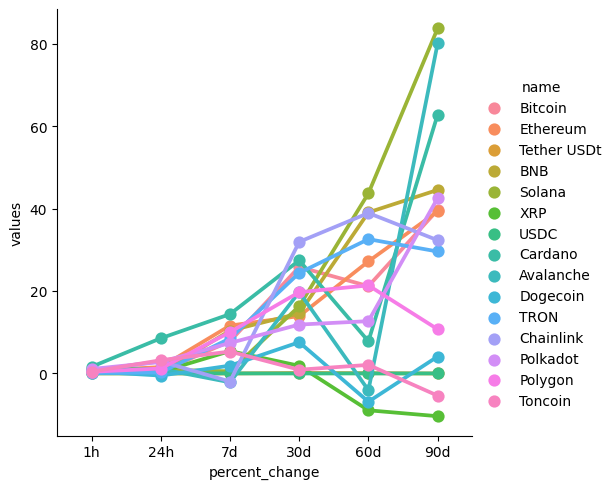

In [51]:
sns.catplot(data=df6,x='percent_change',y='values',hue='name',kind='point')

In [60]:
small_df=df74[['name','quote.USD.price','timestamp']]
small_df=small_df.query("name=='Bitcoin'")
small_df

,name,quote.USD.price,timestamp
0,Bitcoin,51984.31976,2024-02-18 09:24:26.044773
15,Bitcoin,51984.31976,2024-02-18 09:25:11.598201
30,Bitcoin,51941.47423,2024-02-18 09:25:56.931715
45,Bitcoin,51941.47423,2024-02-18 09:26:42.434529


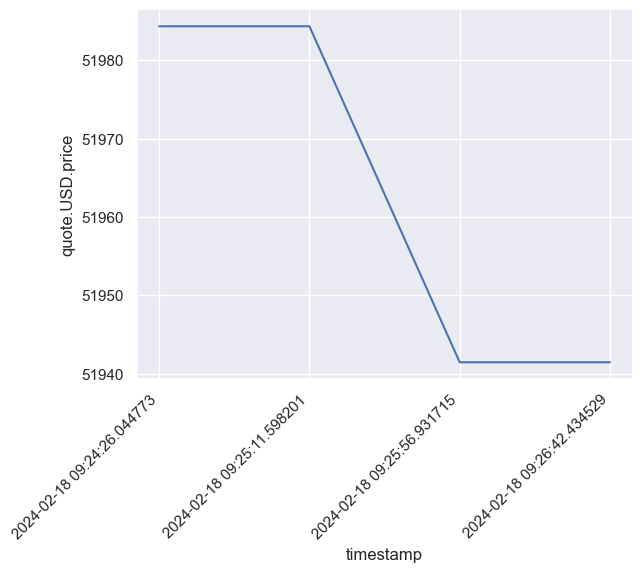

In [63]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=small_df,x='timestamp',y='quote.USD.price')
plt.xticks(rotation=45, ha='right')
plt.show();